In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
#load data
data = loadmat('ex7data1.mat')
data.keys()
X=data['X']

dict_keys(['__version__', 'X', '__header__', '__globals__'])

In [23]:
# normalize X
X_mean=np.mean(X,0)
X_std=np.std(X,0)
X_norm=(X-X_mean)/X_std

In [24]:
# run the PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_norm)

PCA(copy=True, n_components=2, whiten=False)

In [29]:
# fractions of variabilities explained by the two components
print(pca.explained_variance_ratio_) 
# components, U
print(pca.components_)

[ 0.86776519  0.13223481]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[ -1.17683641e-16   1.12354570e-15]


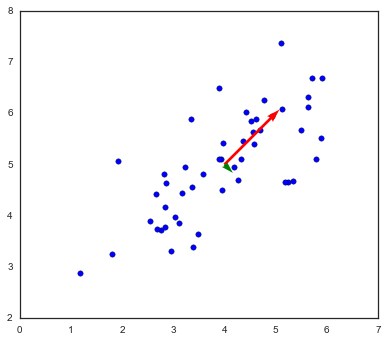

In [26]:
# plot the two vectors
plt.scatter(X[:,0],X[:,1],marker='o',s=30,c='b');
plt.gca().set_aspect('equal');
plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]), pca.components_[0,0], pca.components_[0,1], scale=8.0/pca.explained_variance_[0], color='r');
plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]), pca.components_[1,0], pca.components_[1,1], scale=8.0/pca.explained_variance_[1], color='g');

In [42]:
# project data
X_reduced=pca.transform(X_norm)[:,0]
print(X_reduced[0])

-1.49631260846


In [43]:
# recover data
X_recovered=pca.inverse_transform(np.c_[X_reduced,np.zeros(np.shape(X_reduced))])
print(X_recovered[0])
print(X_norm[0])

[-1.05805279 -1.05805279]
[-0.52331306 -1.59279252]


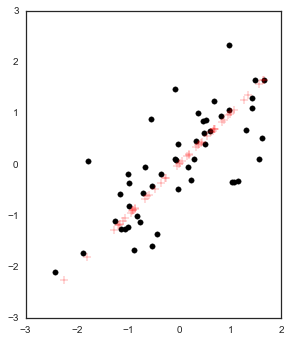

In [47]:
# plot
plt.scatter(X_norm[:,0],X_norm[:,1],marker='o',s=30,c='k');
plt.gca().set_aspect('equal');
plt.scatter(X_recovered[:,0],X_recovered[:,1],marker='+',s=50,c='r');
